In [8]:
# set up
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import *

In [9]:
def q3a():
    # read file to begin with
    df = pd.read_csv("coursework.csv")
    plt.figure(figsize=(14, 6))
    # categorising 
    df['personal_status'] = df['personal_status'].astype('category')
    df['personal_status'].cat.rename_categories(["'male div/sep'", "'female div/dep/mar'", "'male single'", "'male mar/wid'"]) # automatic categorising, female/single doesn't exist
    # plot
    _, _, patches = plt.hist([df['personal_status'][df['class'] == "good"],
              df['personal_status'][df['class'] == "bad"]],
    label=['good','bad'], bins = 4) # bins = 4, since 4 groups
    # for all bar_containers label the values
    for patch in patches:
        plt.bar_label(patch)

    plt.legend(loc='upper right')
    plt.xlabel('personal status')
    plt.show()


In [10]:
def q3b():
    # read file to begin with
    df = pd.read_csv("coursework.csv")
    plt.figure(figsize=(14, 6))
    # categorising 
    df['job'] = df['job'].astype('category')
    df['job'].cat.rename_categories(["'unemp/unskilled non res'", "'unskilled resident '", "'skilled'", "'high qualif/self emp/mgmt'"]) # automatic categorising, 
    # plot
    _, _, patches = plt.hist([df['job'][df['class'] == "good"],
              df['job'][df['class'] == "bad"]],
             label=['good', 'bad'], bins = 4) # bins = 4, since 4 groups
    # for all bar_containers label the values
    for patch in patches:
        plt.bar_label(patch)
    plt.legend(loc='upper right')
    plt.xlabel('job status')
    plt.show()

In [11]:
def q4(column, constraints = [1,2,3,4]):
    df= pd.read_csv("CWnumeric.csv")
    # all values
    # sets up dictionary
    dict = {}
    dicts = []
    # keeping all the values as list for f_oneway for all different types of column values
    for i in constraints:
        dict[i] = df[df[column] == i]['class'] # as list
        dicts.append(dict[i])


    # Print the results
    f_stats, p_val = f_oneway(*dicts) # using anova one way multiple groups comparison
    print('f-statistic:', f_stats)
    print('p-value:', p_val)

    # Check if the p-value is less than 0.05 to determine significance
    if p_val < 0.05:
        print(f'There is a significant difference between class and {column}.\n-{column} influences class')
    else:
        print(f'There is no significant difference between class and {column}.\n-{column} does not influence class')
    print('\n')

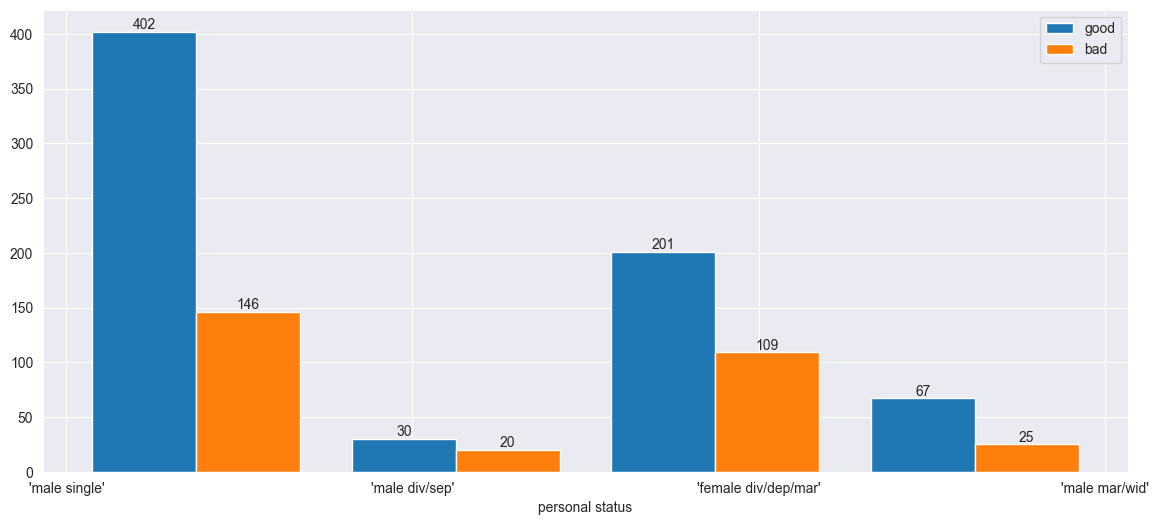

In [12]:
q3a()

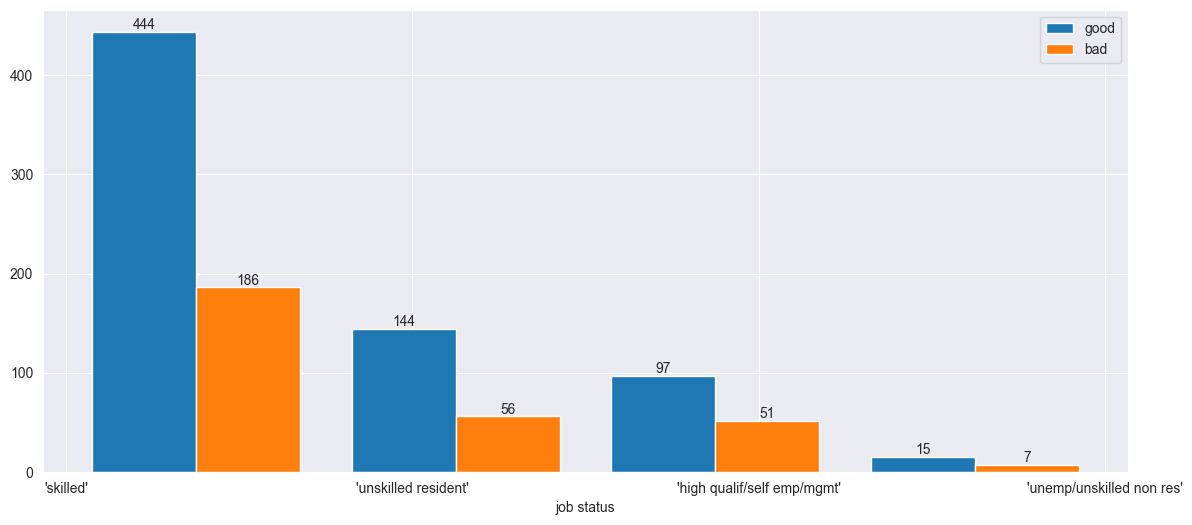

In [13]:
q3b()

In [14]:

# executing code for question 4
q4("purpose", [0,1,2,3,4,5,6,7,9,10]) # 8 is not included as vacation (8) has no values in the dataframe. 
q4("job")
q4("personal_status")

f-statistic: 3.795824368602567
p-value: 0.00010062415990623938
There is a significant difference between class and purpose.
-purpose influences class


f-statistic: 0.6270538957318007
p-value: 0.5976120514901231
There is no significant difference between class and job.
-job does not influence class


f-statistic: 3.2198584639647305
p-value: 0.022110076508894013
There is a significant difference between class and personal_status.
-personal_status influences class
